<a href="https://www.kaggle.com/code/antonasnitsky/nyc-property-sales-eda?scriptVersionId=110672326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview
"NYC Property Sales" it's a dataset, that represents sales of property units in New York.
We'll provide an EDA for this dataset.

# Let's start
First of all we'll import all required instrumentation:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sbs

Now, let's import the actual data:

In [2]:
df = pd.read_csv('/kaggle/input/nyc-property-sales/nyc-rolling-sales.csv')

Now, we'll review the sample data:

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data cleanup
Now, we can drop-off unnecessary columns, and learn about the rest, what is their data types.

In [4]:
clean_df = df.drop(['Unnamed: 0', 'LOT', 'EASE-MENT','APARTMENT NUMBER', 'ADDRESS','ZIP CODE'], axis=1) #

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

Now, we'll see if there are duplicated rows in a dataset.

In [5]:
sum(clean_df.duplicated())

2751

As we can see, there are 2751 of them, so let's remove them.

In [6]:
clean_df = clean_df.drop_duplicates()
sum(clean_df.duplicated())

0

Ok, now we're good. Let's replace non-numeric values of ' -  ' by 0's, so numerical data will be normalized.

In [7]:
clean_df.replace(' -  ', 0,  inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Now, we'll replace NaN values with 0's.

In [8]:
clean_df.replace(np.nan,0, inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


Clumn "BOROUGH" represented as numeric and this is less readable, we'll add a new column of "BOROUGH_NAME" with actual names of boroughs.

In [9]:
clean_df['BOROUGH_NAME'] = clean_df['BOROUGH'].astype(str)
clean_df['BOROUGH_NAME'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


We'll add new column with more consice value of sale price in millions of $.

In [10]:
clean_df['SALE_PRICE_IN_M'] = clean_df['SALE PRICE'].astype(np.float64) / 1000000
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan,6.625000
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan,0.000000
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan,0.000000
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan,3.936272
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island,0.450000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island,0.550000
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island,0.460000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island,11.693337


In addition, we'll add column of "YEAR_BUILT" with float values. We'll need it to graphical representaions.

In [11]:
clean_df['YEAR_BUILT'] = clean_df['YEAR BUILT'].astype(np.float64)
clean_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,YEAR_BUILT
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan,6.625000,1900.0
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan,0.000000,1900.0
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan,0.000000,1900.0
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan,3.936272,1913.0
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan,8.000000,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island,0.450000,1998.0
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island,0.550000,1998.0
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island,0.460000,1925.0
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island,11.693337,2001.0


The last one change, we'll create categorical column of "SALE_MONTH" which represents month of property sale.

In [12]:
clean_df['SALE DATE'] = pd.to_datetime(clean_df['SALE DATE'])
clean_df['SALE_MONTH']= clean_df['SALE DATE'].dt.month

clean_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_NAME,SALE_PRICE_IN_M,YEAR_BUILT,SALE_MONTH
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan,6.625000,1900.0,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,Manhattan,0.000000,1900.0,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,Manhattan,0.000000,1900.0,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan,3.936272,1913.0,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan,8.000000,1900.0,11


Now, those are our columns:

In [13]:
clean_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'BUILDING CLASS AT PRESENT',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'BOROUGH_NAME', 'SALE_PRICE_IN_M',
       'YEAR_BUILT', 'SALE_MONTH'],
      dtype='object')

Now, let's try to see some connections between numeric columns. We'll use pair plot for this:

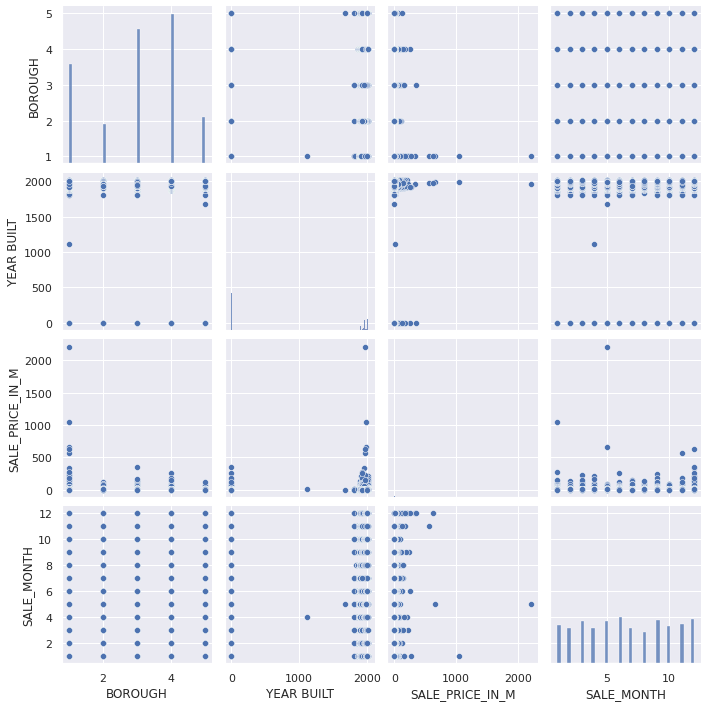

In [14]:
sbs.set()
cols = ['BOROUGH', 'YEAR BUILT', 'SALE_PRICE_IN_M', 'SALE_MONTH']
sbs.pairplot(clean_df[cols],)
plt.show();

Now, we can see some kind connections, price in millions vs. year when property was built.

# Analysis

First, we;ll see how many proeprties sold by Boroughs. We;ll see that most properies was ssold in Brooklyn and Queens.

Text(0.5, 1.0, "Borough by property's sales amount")

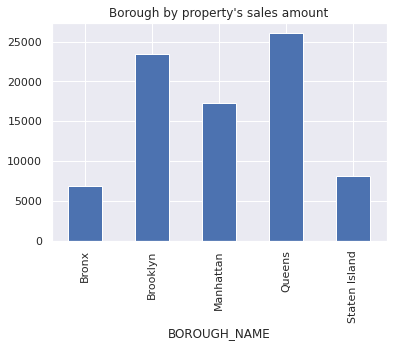

In [15]:
clean_df['SALE_PRICE_IN_M'].groupby(clean_df['BOROUGH_NAME']).count().plot.bar()
plt.title("Borough by property's sales amount")

Now, we gonna see where properties are more expensive. Not suprasignly - Manhattan.

Text(0.5, 1.0, "Borough by property's average price (in M)")

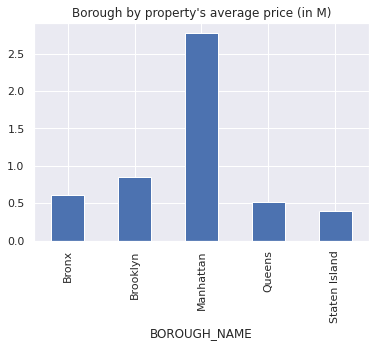

In [16]:
clean_df['SALE_PRICE_IN_M'].groupby(clean_df['BOROUGH_NAME']).mean().plot.bar()
plt.title("Borough by property's average price (in M)")

So, let's finf out which of neighborhoods in Manhattan are most expensive. And the Oscar goes...  to Midtown!!

Text(0.5, 1.0, 'Properties avg price($M) in Manhattan ')

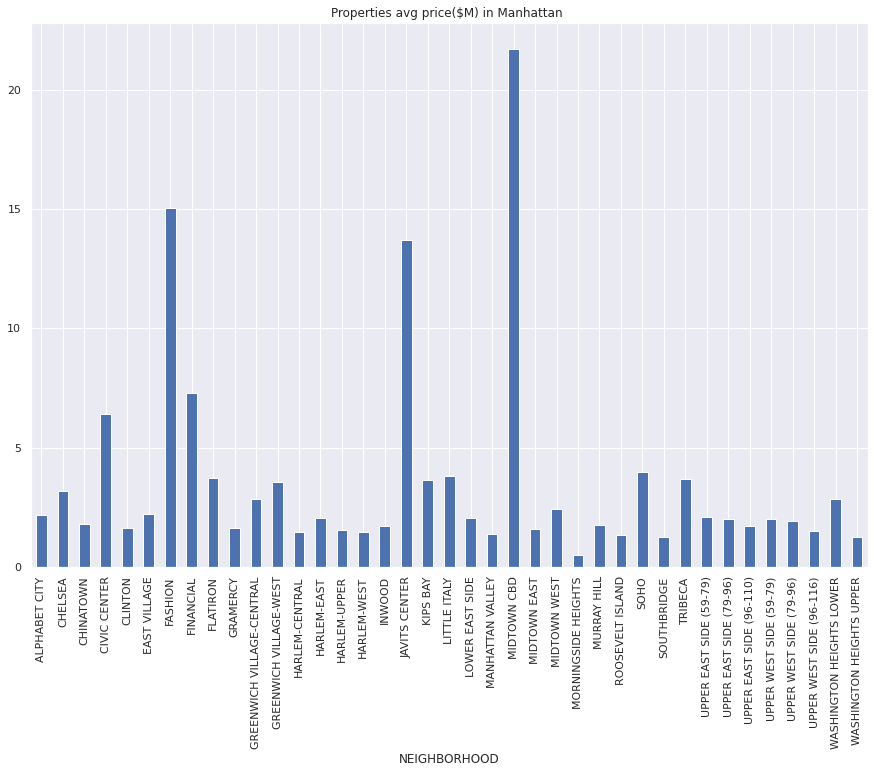

In [17]:
manhattan_sales = clean_df[clean_df['BOROUGH_NAME'] == 'Manhattan']
manhattan_sales['SALE_PRICE_IN_M'].groupby(manhattan_sales['NEIGHBORHOOD']).mean().plot.bar(figsize=(15, 10))
plt.title("Properties avg price($M) in Manhattan ")


Niw, we wont to show connection between month of the deal and the price (in $M). But let's prepare the data first.

First, we prepare dataset of average price in neighborhoods in Manhattan and take 5 most expensive.

In [18]:
avg_price = manhattan_sales[['SALE_PRICE_IN_M']].groupby(manhattan_sales['NEIGHBORHOOD']).mean()
avg_price = avg_price.sort_values(by='SALE_PRICE_IN_M', ascending=False)
top_avg_price = avg_price.head(5)

Now, we'll break out multilevel index for a single level.

In [19]:
top_5_neighborhoods = top_avg_price.index.values

top_5 = clean_df[clean_df['NEIGHBORHOOD'].isin(top_5_neighborhoods)]

t = top_5[['NEIGHBORHOOD','SALE_PRICE_IN_M', 'SALE_MONTH']] 
t = t.groupby(['NEIGHBORHOOD','SALE_MONTH'])[['SALE_PRICE_IN_M']].count()

t = t.reset_index(level=1)
t = t.reset_index(level=0)
t

,NEIGHBORHOOD,SALE_MONTH,SALE_PRICE_IN_M
0,CIVIC CENTER,1,40
1,CIVIC CENTER,2,21
2,CIVIC CENTER,3,24
3,CIVIC CENTER,4,38
4,CIVIC CENTER,5,31
5,CIVIC CENTER,6,22
6,CIVIC CENTER,7,21
7,CIVIC CENTER,8,12
8,CIVIC CENTER,9,37
9,CIVIC CENTER,10,27


At last, let's draw the chart

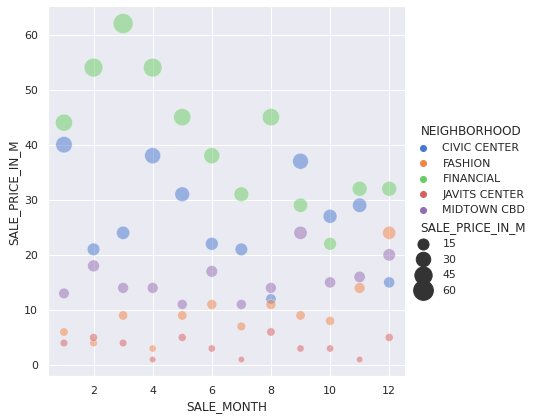

In [20]:
ax = sbs.relplot(x="SALE_MONTH", y="SALE_PRICE_IN_M", hue="NEIGHBORHOOD", size="SALE_PRICE_IN_M",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=t)
ax.set(ylabel="SALE_PRICE_IN_M")
plt.show()

The last connection we want to observe - property price (in $M)  vs year of when property was built.

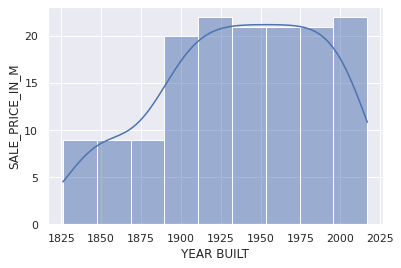

In [21]:
year_built_vs_price = clean_df[['YEAR BUILT', 'SALE_PRICE_IN_M']]
year_built_vs_price = year_built_vs_price[(year_built_vs_price['YEAR BUILT'] > 1800) & (year_built_vs_price['YEAR BUILT'] < 2023)].groupby('YEAR BUILT')[['SALE_PRICE_IN_M']].mean()
year_built_vs_price = year_built_vs_price.reset_index(level=0)

ax = sbs.histplot(year_built_vs_price['YEAR BUILT'], kde=True)
ax.set(ylabel="SALE_PRICE_IN_M")
plt.show()



Thanks a lot!!